<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [1]:
import numpy as np
from scipy.sparse import csr_matrix


def generate_mat(N):
    assert N >= 0
    if N == 0: return np.array([1]), np.array([1])

    f = np.concatenate([np.zeros(N), [1]], axis=0, dtype=np.double)

    A = np.zeros([N + 1, N + 1], dtype=np.double)
    for i in range(1, N):
        A[i, i - 1:i + 2] = [-1, 2. - (29 * 29 * np.pi * np.pi / 4 / N / N), -1]
    A[0, 0] = 1
    A[N, N] = 1

    f = csr_matrix(f)
    A = csr_matrix(A)
    # A = csc_matrix(A)

    return A, f


A, f = generate_mat(8)
# print(A, '\n\n', f)

* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


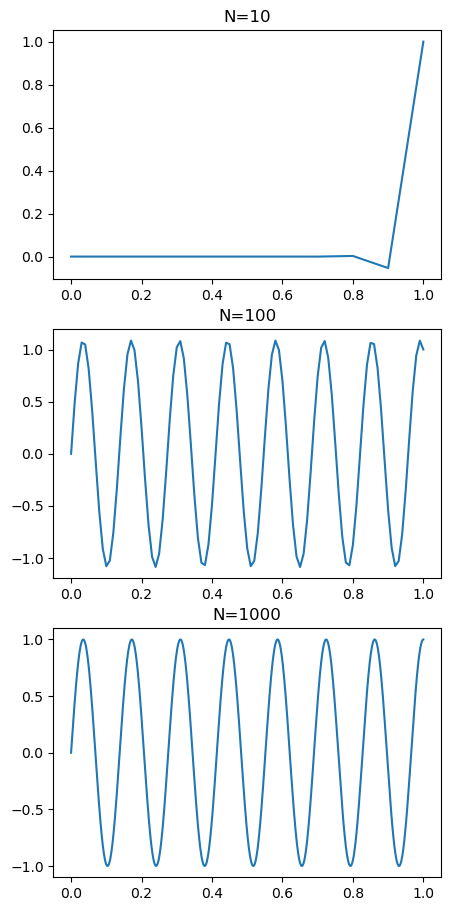

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

i = 0
fig, ax = plt.subplots(3, 1, figsize=(5, 11))
print(ax)

for N in [10, 100, 1000]:
    A, f = generate_mat(N)
    u = spsolve(A, f.T)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u)
    ax[i].set_title('N=' + str(N))
    i = i + 1

plt.show()

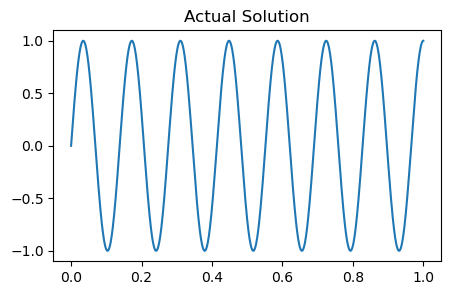

In [ ]:
k = 29. * np.pi / 2.
x = np.linspace(0, 1, 1000)

u = np.sin(k * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?




Answer:
* As N increases, more data points are obtained and therefore the plot becomes more accurate, curvy and  approaches the actual solution.
* Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

  0%|          | 0/70 [00:00<?, ?it/s]

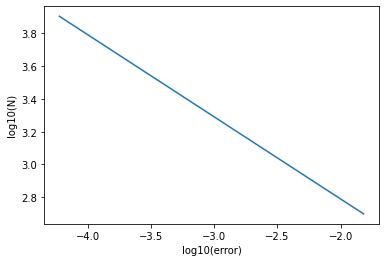

In [13]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

k = 29. * np.pi / 2.
error = []
sizes = np.round(np.linspace(500, 8000, 70))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))
    u = spsolve(A, f.T)
    u_exact = np.sin(k * x)  #!!
    error.append(np.max(np.abs(u - u_exact)))

plt.plot(np.log10(error), np.log10(sizes))
plt.xlabel('log10(error)')
plt.ylabel('log10(N)')
ax = plt.gca()
plt.show()

# print(sizes, '\n', error)

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

  0%|          | 0/70 [00:00<?, ?it/s]

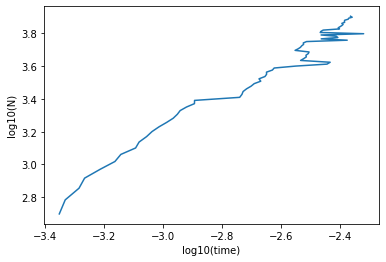

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import timeit

k = 29. * np.pi / 2.
times = []
sizes = np.round(np.linspace(500, 8000, 70))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))

    t = timeit.Timer(lambda: spsolve(A, f.T)).timeit(1000)

    times.append(t / 1000)

plt.plot(np.log10(times), np.log10(sizes))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()

* pick a value of that you would expect to give error of or 10<sup>-8</sup> less.
* Briefly (1-2 sentences) explain how you picked your value of *N*
* predict how long the computation will take

In [15]:
from sympy import symbols, solve
import math

log_time = np.log10(times)
log_error = np.log10(error)
log_size = np.log10(sizes)

f1 = np.polyfit(log_error, log_size, 1)
print('Fit function of log_error & log_size:( where x=log10(N) )', np.poly1d(f1))

x = symbols('x')
a = solve(f1[0] * x + f1[1] < -8)
print('\nSolve {:.3} x + {:.3} < -8: \n'.format(f1[0], f1[1]), a)
result_logN = a.args[0].args[0]
result_N = math.ceil(math.pow(10., result_logN))
print('\nExpected minimum value of N that satisfies the given condition:\n', result_N)

f2 = np.polyfit(log_size, log_time, 1)
print('\nFit function of log_size & log_time: ( where x=log10(t) )', np.poly1d(f2))

x_time = math.pow(10., f2[0] * result_logN + f2[1])
print('\nExpected computation time:\n{:.0f}'.format(x_time))

Fit function of log_error & log_size:( where x=log10(N) )  
-0.5 x + 1.79

Solve -0.5 x + 1.79 < -8: 
 (19.5817847510734 < x) & (x < oo)

Expected minimum value of N that satisfies the given condition:
 38175501509880594432

Fit function of log_size & log_time: ( where x=log10(t) )  
0.9331 x - 5.973

Expected computation time:
1985974241465


* Compute the approximate solution with your value of *N*.
* Measure the time taken and the error
* Briefly (1-2 sentences) comment on how these compare to your predictions.

Answer:
1. Using `np.polyfit` and obtain fit functions of `log10(error) and log10(N)` and `log10(N) and log10(time)`
2. Obtain minimum N by solving the inequation that constrict `log10(error) < -8`
3. Obtain expected time by taking the `log10(minN)` value into fit funciton of `log10(N) and log10(time)`
* Calculated according to the fit functions, the expected minimum N which is printed above, is not possible for my computer to compute.
* Moreover, due to lack of memory and overflow problem, this number is not perfectly accurate. 

# Part2

* Implement this iterative scheme in Python.
    * You should implement this as a function that takes *N* as an input.

In [3]:
import numpy as np
def solve_u(N, t):
    h = 1 / N
    T = N * t
    u = np.zeros((N + 1, T + 1))
    A = np.zeros((N - 1, N + 1))
    # u[:,0]=0

    u[0, :] = 10
    u[N, :] = 10
    for i in range(N - 1):
        A[i, i:i + 3] = [1 / 1000 / h, 1 - 2 / 1000 / h, 1 / 1000 / h]

    for j in range(1, T + 1):
        u[1:N, j] = A @ u[:, j - 1]

    return u


* plot the temperature of the rod at *t=1, t=2* and *t=10* .

  0%|          | 0/3 [00:00<?, ?it/s]

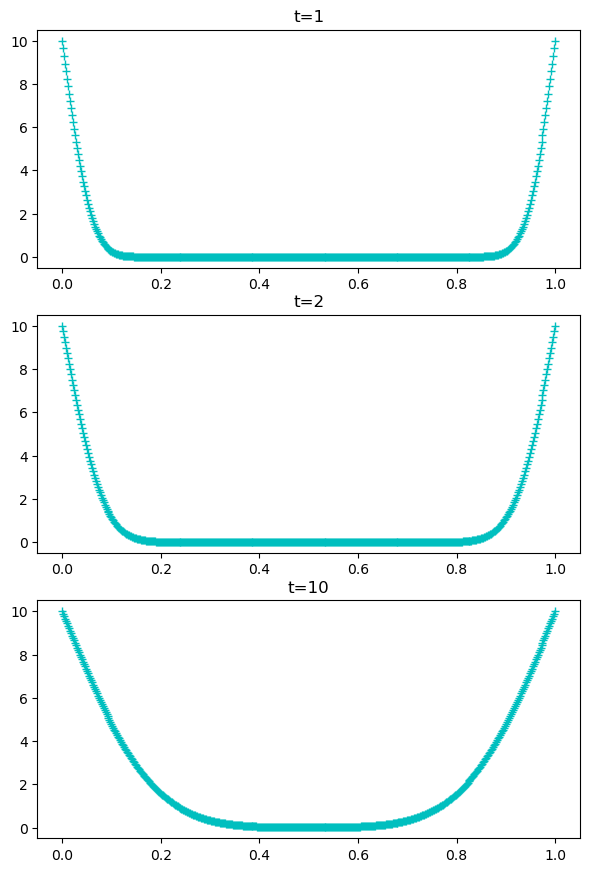

In [41]:
% matplotlib inline
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

ts = [1, 2, 10]
N = 500
fig, ax = plt.subplots(len(ts), 1, figsize=(7, len(ts) * 3.5))
u = solve_u(N, np.max(ts))
for count, t in enumerate(tqdm(ts)):
    x = np.linspace(0, 1, N + 1)
    # print(u[:, t * N])
    ax[count].plot(x, u[:, t * N], 'c+')
    ax[count].set_title('t=' + str(t))

plt.show()

* Briefly (1-2 sentences) comment on how you picked a value for *N*.

MemoryError: Unable to allocate 478. MiB for an array with shape (501, 125001) and data type float64

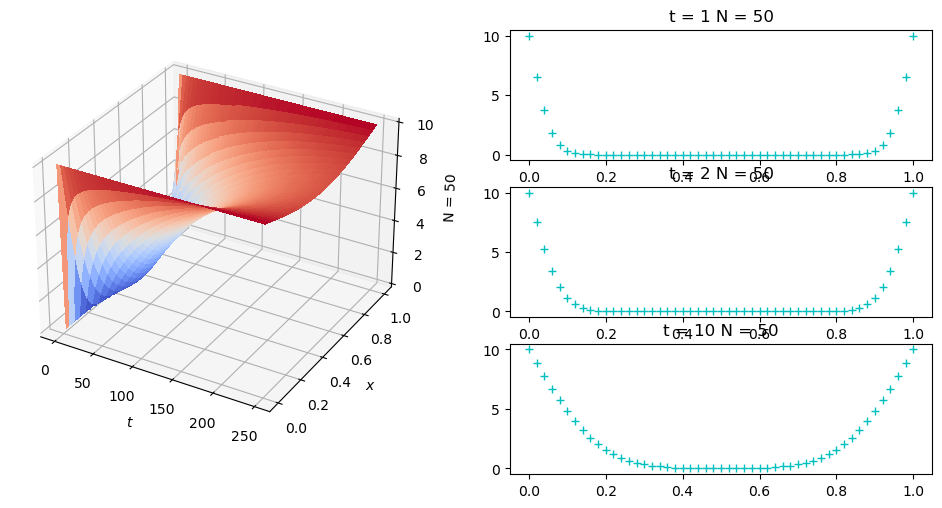

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

Ns = [50, 500, 501]
ts = np.array([1, 2, 10])


def plot():
    t_3d = 250

    fig = plt.figure(figsize=(12, 2 * len(ts) * len(Ns)))

    for i, N in enumerate(Ns):
        sol = solve_u_gpu(N, t_3d)

        ticksX = np.linspace(0, t_3d, N * t_3d + 1)
        ticksY = np.linspace(0, 1, N + 1)
        X, Y = np.meshgrid(ticksX, ticksY)

        ax = fig.add_subplot(len(Ns), 2, 2 * i + 1, projection='3d')
        ax.plot_surface(X, Y, sol, antialiased=False, cmap=cm.coolwarm)
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$x$')
        ax.set_zlabel(r'N = {}'.format(N))

        for count, t in enumerate(ts):
            ax1 = fig.add_subplot(len(ts) * len(Ns), 2, 2 * count + 2 + 6 * i)
            x = np.linspace(0, 1, N + 1)
            ax1.plot(x, sol[:, t * N], 'c+')
            ax1.set_title('t = {} N = {}'.format(t, N))
    fig.tight_layout(h_pad=1)
    plt.show()


plot()

Answer:
* We can consider N as the number of slices we devide unit 1 into(in both time dimension and x dimension), larger N results in higher accuracy, so ideally N is larger the better.
* But when N is too larger, minor error appears when t is small(due to low percision of float64), and this error was gradually enlarged as we calculate for larger t. Therefore, these negative and extremely large values resulted in a fluctuated curve.
* The test above indicates that **N = 500** would be the optimal value



* Use numba.cuda to parallelize your implementation on a GPU
    * think carefully about when data needs to be copied, and be careful not to copy data to/from the GPU when not needed.

In [7]:

import numpy as np
from numba import cuda


def solve_u_gpu(N, t):
    T = N * t
    h = 1 / N
    block_per_grid = 5
    t_per_block_i = (N + 1) // block_per_grid + 1

    blocks = (block_per_grid, 1)
    threads = (t_per_block_i, 1)

    @cuda.jit
    def kernel(u, j):
        px = cuda.grid(1)
        if px >= N + 1 or j >= T + 1:
            return

        if px == 0 or px == N:
            u[px, j] = 10
        else:
            u[px, j] = u[px, j - 1] + (u[px - 1, j - 1] - 2 * u[px, j - 1] + u[px + 1, j - 1]) / 1000 / h

        cuda.syncthreads()

    # print('blocks/grid: {0} ({2}*{2})\nthreads/block: {1} ({3}*{3})'.format(block_per_grid ** 2, t_per_block ** 2,
    #                                                                         block_per_grid, t_per_block))
    u = cuda.device_array(shape=(N + 1, T + 1), dtype=np.float32)
    u[:, 0] = 0
    u[0, :] = 10
    u[N, :] = 10
    for j in range(1, T + 1):
        kernel[blocks, threads](u, j)

    u = u.copy_to_host()

    return u


In [8]:
def cuda_init():
    cuda.detect()
    cuda.device_array(shape=(2, 2), dtype=np.float32)
    print('\nInitialization complete')


cuda_init()

Found 1 CUDA devices
id 0    b'NVIDIA GeForce RTX 3070 Laptop GPU'                              [SUPPORTED]
                      Compute Capability: 8.6
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-c45229f2-1f33-55e7-465d-395a04c8765d
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported

Initialization complete


* Use your code to estimate the time at which the temperature of the midpoint of the rod first exceeds a temperature of 9.8.
* Briefly (2-3 sentences) describe how you estimated this time.

Minimum t that satisfies the given condition: 421.98
 or 422 if t must be an integer


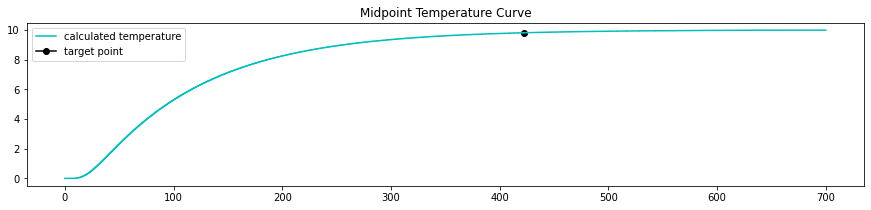

In [10]:

import matplotlib.pyplot as plt

N = 500
x = N // 2
t = 700
T = N * t

plt.figure(figsize=(15, 3))
u = solve_u_gpu(N, t)[x, :]

t = np.linspace(0, T, T + 1)

target_T = np.argwhere(u >= 9.8)[0]
target_t = target_T / N

print('Minimum t that satisfies the given condition: {}\n or {} if t must be an integer'.format(float(target_t),
                                                                                                int(np.round(
                                                                                                    target_t[0]))))

p1, = plt.plot(target_t, u[target_T], marker='o', color='black')
p2, = plt.plot(t // N, u, 'c-')
plt.title('Midpoint Temperature Curve')

plt.legend([p2, p1], ["calculated temperature", 'target point'], loc='upper left')

plt.show()

Answer:
1. Use the `solve_u_gpu(N,t)` method to calculate the u matrix which includes the temperature information from t=0 to t=700 (where the temperature exceeds 9.8).
2. Only reserve the elements on the `N // 2` row since this row of data represent the temperatures of the midpoint.
3. Find the column index of the first element that exceeds 9.8
4. This index multiplies N will give the actual time that satisfies the condition.